In [2]:
import h5py
import pandas as pd

with h5py.File("health_metrics.h5", "r") as f:
   
    print("Datasets in file:", list(f.keys()))
    
   
    age = f["age"][:]
    bmi = f["bmi"][:]
    cholesterol = f["cholesterol"][:].astype(str)  
    glucose = f["glucose"][:].astype(str)
    activity = f["activity_level"][:]
    disease = f["has_disease"][:]

data = pd.DataFrame({
    "Age": age,
    "BMI": bmi,
    "Cholesterol": cholesterol,
    "Glucose": glucose,
    "Activity_Level": activity,
    "Has_Disease": disease
})



Datasets in file: ['activity_level', 'age', 'bmi', 'cholesterol', 'glucose', 'has_disease']


In [3]:
data.head()

,Age,BMI,Cholesterol,Glucose,Activity_Level,Has_Disease
0,84,18.3,normal,high,6,0
1,35,27.8,normal,normal,3,0
2,75,29.0,very high,normal,8,0
3,65,24.7,normal,normal,9,0
4,50,28.7,high,normal,1,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             60000 non-null  int64  
 1   BMI             60000 non-null  float64
 2   Cholesterol     60000 non-null  object 
 3   Glucose         60000 non-null  object 
 4   Activity_Level  60000 non-null  int64  
 5   Has_Disease     60000 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 2.7+ MB


In [5]:
data.describe()

,Age,BMI,Activity_Level,Has_Disease
count,60000.000000,60000.000000,60000.00000,60000.000000
mean,53.501700,24.964327,4.50735,0.148800
std,20.791817,5.001941,2.86455,0.355894
min,18.000000,3.800000,0.00000,0.000000
25%,36.000000,21.600000,2.00000,0.000000
50%,53.000000,25.000000,5.00000,0.000000
75%,71.000000,28.300000,7.00000,0.000000
max,89.000000,44.500000,9.00000,1.000000


In [6]:
data.sample(10)

,Age,BMI,Cholesterol,Glucose,Activity_Level,Has_Disease
2333,63,30.7,normal,very high,3,0
49985,87,17.7,high,very high,6,0
38221,62,15.0,normal,very high,3,0
57148,30,32.6,normal,normal,2,0
47266,87,19.6,very high,normal,6,0
17476,72,23.8,normal,high,5,0
13677,39,23.5,high,normal,0,0
28682,61,22.8,very high,normal,4,0
29116,36,29.3,high,normal,2,1
43619,71,21.9,high,normal,3,0


EDA - Exploratory Data Analysis

In [7]:
data.value_counts()

Age  BMI   Cholesterol  Glucose    Activity_Level  Has_Disease
89   28.8  normal       normal     4               0              4
24   24.5  normal       normal     6               0              3
21   26.5  normal       normal     6               0              3
79   27.8  normal       normal     1               0              3
19   27.2  normal       normal     1               0              3
                                                                 ..
42   22.5  very high    high       4               1              1
     22.6  high         normal     0               0              1
           normal       high       8               0              1
                        normal     7               0              1
89   39.4  normal       very high  4               0              1
Name: count, Length: 58284, dtype: int64

In [15]:
# Assumes: df is a pandas DataFrame with columns: 'Age', 'BMI', 'Activity_Level'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


AGE Groups

In [9]:
age_bins = [17, 35, 50, 65, 120]  
age_labels = ["18-35", "36-50", "51-65", "66+"]
data["Age_Group"] = pd.cut(data["Age"], bins=age_bins, labels=age_labels, right=True, include_lowest=True)

age_counts = data["Age_Group"].value_counts(dropna=False).sort_index()
age_pct = (age_counts / len(data) * 100).round(2)

print("Age group counts:\n", age_counts)
print("\nAge group percentages (%):\n", age_pct)


Age group counts:
 Age_Group
18-35    14908
36-50    12610
51-65    12491
66+      19991
Name: count, dtype: int64

Age group percentages (%):
 Age_Group
18-35    24.85
36-50    21.02
51-65    20.82
66+      33.32
Name: count, dtype: float64


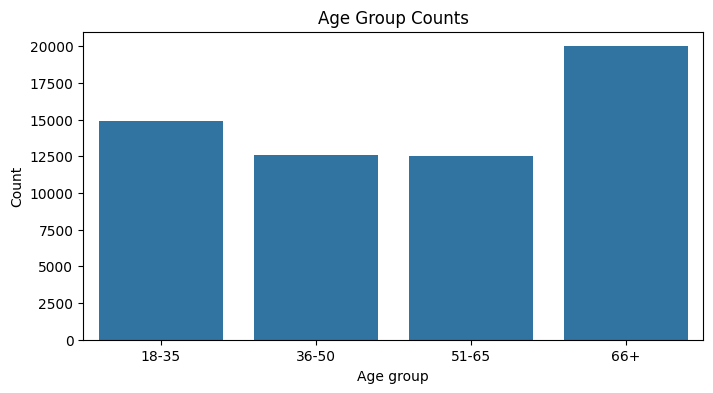

In [10]:
plt.figure(figsize=(8,4))
sns.countplot(x="Age_Group", data=data, order=age_labels)
plt.title("Age Group Counts")
plt.xlabel("Age group")
plt.ylabel("Count")
plt.show()

BMI


BMI skewness: -0.010  (positive = right/skewed, negative = left/skewed)

BMI category counts:
 BMI_Category
underweight     5850
normal         24082
overweight     20502
obese           9566
Name: count, dtype: int64

BMI category percentages (%):
 BMI_Category
underweight     9.75
normal         40.14
overweight     34.17
obese          15.94
Name: count, dtype: float64


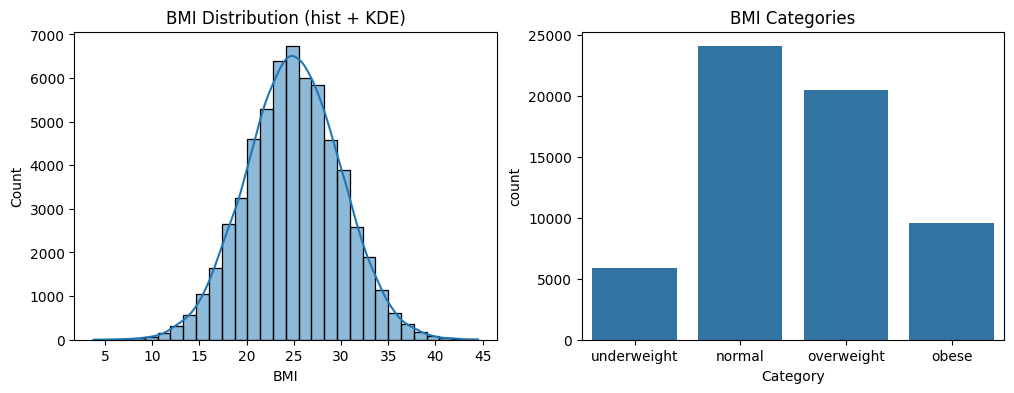

In [12]:
bmi_skew = data["BMI"].skew()
print(f"\nBMI skewness: {bmi_skew:.3f}  (positive = right/skewed, negative = left/skewed)")

def bmi_cat(b):
    if pd.isna(b): return np.nan
    if b < 18.5: return "underweight"
    if b < 25: return "normal"
    if b < 30: return "overweight"
    return "obese"

data["BMI_Category"] = data["BMI"].apply(bmi_cat).astype("category")
bmi_cat_counts = data["BMI_Category"].value_counts().reindex(["underweight","normal","overweight","obese"])
bmi_cat_pct = (bmi_cat_counts / len(df) * 100).round(2)

print("\nBMI category counts:\n", bmi_cat_counts)
print("\nBMI category percentages (%):\n", bmi_cat_pct)

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.histplot(df["BMI"].dropna(), bins=30, kde=True)
plt.title("BMI Distribution (hist + KDE)")
plt.xlabel("BMI")

plt.subplot(1,2,2)
sns.countplot(x="BMI_Category", data=df, order=["underweight","normal","overweight","obese"])
plt.title("BMI Categories")
plt.xlabel("Category")
plt.show()


ACTIVITY LEVEL


Activity_Level descriptive stats:
 count    60000.00000
mean         4.50735
std          2.86455
min          0.00000
25%          2.00000
50%          5.00000
75%          7.00000
max          9.00000
Name: Activity_Level, dtype: float64

Activity bucket counts:
 Activity_Bucket
sedentary    17906
light        17950
moderate     12265
high         11879
Name: count, dtype: int64

Activity bucket percentages (%):
 Activity_Bucket
sedentary    29.84
light        29.92
moderate     20.44
high         19.80
Name: count, dtype: float64


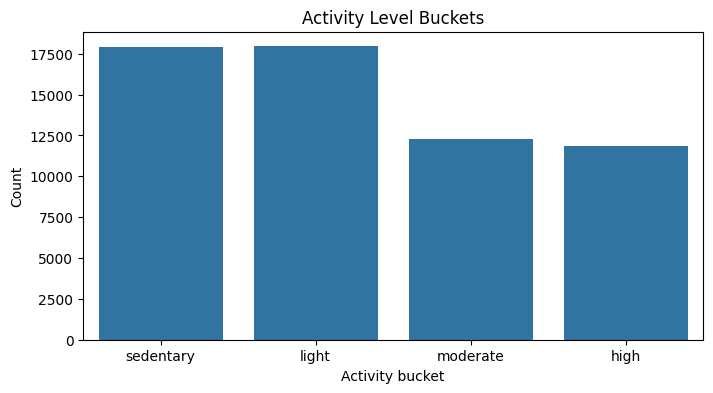

In [13]:
print("\nActivity_Level descriptive stats:\n", data["Activity_Level"].describe())


act_bins = [-1, 2, 5, 7, data["Activity_Level"].max()]
act_labels = ["sedentary", "light", "moderate", "high"]
data["Activity_Bucket"] = pd.cut(data["Activity_Level"], bins=act_bins, labels=act_labels, include_lowest=True)

act_counts = data["Activity_Bucket"].value_counts().reindex(act_labels)
act_pct = (act_counts / len(df) * 100).round(2)

print("\nActivity bucket counts:\n", act_counts)
print("\nActivity bucket percentages (%):\n", act_pct)

plt.figure(figsize=(8,4))
sns.countplot(x="Activity_Bucket", data=data, order=act_labels)
plt.title("Activity Level Buckets")
plt.xlabel("Activity bucket")
plt.ylabel("Count")
plt.show()

SUMMARY

In [16]:

print("\n--- Summary ---")
print(f"Most common age group: {age_pct.idxmax()} ({age_pct.max()}%)")
print(f"Most common BMI category: {bmi_cat_pct.idxmax()} ({bmi_cat_pct.max()}%)")
print(f"Most common activity bucket: {act_pct.idxmax()} ({act_pct.max()}%)")



--- Summary ---
Most common age group: 66+ (33.32%)
Most common BMI category: normal (40.14%)
Most common activity bucket: light (29.92%)


In [17]:
data.to_csv("cleaned_health_metrics.csv", index=False)

Now i will proceed to create dashboard using streamlit. 